<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Proyecto 1: Imagenes médicas</font></b></h1>
        <h2><font color='0B5345'>Luisa Fernanda Enciso - Juan Diego Caguasango</font></h2>
    </div>
</div>

In [2]:
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_file
from pydicom import dcmread

<hr>
<h3><strong>1. Análisis de metadatos dicom y visualización</strong></h3>

**1.1.  Extraer y analizar los metadatos DICOM**


 Utilizar pydicom para extraer la metadata

In [10]:
# Ruta absoluta al archivo DICOM (puedes usar también rutas relativas si estás en el mismo directorio)
fpath = r"C:\Users\luisa\Downloads\ImagenesTrabajo1\Patient01\100\74741.4976.61812.26868.17427.42996.33493.37530.34501.100.9.dcm"

ds = dcmread(fpath) # Lectura del archivo DICOM

ds # Imprimir el contenido completo del objeto DICOM (metadatos + cabecera + estructura)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 176
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 74741.4976.61812.26868.17427.42996.33493.37530.34501.100.9
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.773
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 74741.4976.61812.26868.17427.42996.33493.37530.34501.100.9
(0008,0020) Study Date                          DA: '20230821'
(0008,0021) Series Date                         DA

In [11]:
# Extraer metadata
fields = {
    "PatientName": getattr(ds, "PatientName", "No disponible"),
    "Modality": getattr(ds, "Modality", "No disponible"),
    "SliceThickness": getattr(ds, "SliceThickness", "No disponible"),
    "KVP": getattr(ds, "KVP", "No disponible"),
    "BodyPartExamined": getattr(ds, "BodyPartExamined", "No disponible"),
    "RelativeXRayExposure": getattr(ds, "RelativeXRayExposure", "No disponible"),
    "ExposureTime": getattr(ds, "ExposureTime", "No disponible"),
    "PhotometricInterpretation": getattr(ds, "PhotometricInterpretation", "No disponible"),
    "Manufacturer": getattr(ds, "Manufacturer", "No disponible"),
    "ManufacturerModelName": getattr(ds, "ManufacturerModelName", "No disponible"),
}

# Mostrar resultados
for key, value in fields.items():
    print(f"{key}: {value}")

PatientName: anonymize
Modality: CT
SliceThickness: 0
KVP: 85
BodyPartExamined: 
RelativeXRayExposure: No disponible
ExposureTime: No disponible
PhotometricInterpretation: MONOCHROME2
Manufacturer: Sirona
ManufacturerModelName: 


 Organizar la metadata extraída en Name, Tag, Type y Value, explique a qué hace referencia 
cada uno de ellos, el grupo al que pertenece, su relevancia y los valores válidos para ese 
metadato.

In [17]:
import pydicom
import pandas as pd

fpath = r"C:\Users\luisa\Downloads\ImagenesTrabajo1\Patient01\100\74741.4976.61812.26868.17427.42996.33493.37530.34501.100.9.dcm"
ds = pydicom.dcmread(fpath)

metadata_rows = []

for elem in ds.iterall():
    tag = f"({elem.tag.group:04X},{elem.tag.element:04X})"
    name = elem.name
    vr = elem.VR
    value = elem.value if isinstance(elem.value, (str, int, float)) else str(elem.value)

    # Prevención de error: convertir a string solo para truncar si es muy largo
    value_str = str(value)
    if len(value_str) > 100:
        value = value_str[:100] + "..."

    metadata_rows.append({
        "Name": name,
        "Tag": tag,
        "Type": vr,
        "Value": value
    })

df_metadata = pd.DataFrame(metadata_rows)

# Campos de interés
campos_deseados = [
    "PatientName", "Modality", "SliceThickness", "KVP", "BodyPartExamined",
    "RelativeXRayExposure", "ExposureTime", "PhotometricInterpretation",
    "Manufacturer", "ManufacturerModelName"
]

df_filtrado = df_metadata[df_metadata["Name"].isin(campos_deseados)]
df_filtrado


,Name,Tag,Type,Value
13,Modality,"(0008,0060)",CS,CT
14,Manufacturer,"(0008,0070)",LO,Sirona
33,KVP,"(0018,0060)",DS,85.0


**1.2. Interpretación Técnica**


 Explicar cómo los parámetros técnicos se relacionan con el principio físico de la modalidad 
seleccionada. 

**1.3. Visualización**


 Cargar la imagen DICOM en Python y graficarla utilizando matplotlib. 

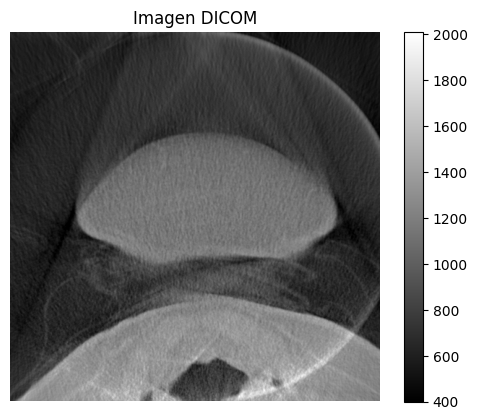

In [14]:
# Acceder a los datos de la imagen
image = ds.pixel_array

# Mostrar la imagen usando matplotlib
plt.imshow(image, cmap='gray')
plt.title("Imagen DICOM")
plt.axis("off")  
plt.colorbar()
plt.show()


<hr>
<h3><strong>2. Comparación multimodal de imágenes</strong></h3>

* Identificar la modalidad de cada imagen.

In [ ]:
# Lista de rutas a las imágenes DICOM
rutas_dicom = [
    r"C:\Users\luisa\Downloads\ImagenesTrabajo1\Modalidad1\201\1.3.46.670589.11.45555.5.0.8860.2024062407350848047.dcm",
    r"C:\Users\luisa\Downloads\ImagenesTrabajo1\Modalidad2\ScalarVolume_13\IMG0001.dcm",
    r"C:\Users\luisa\Downloads\ImagenesTrabajo1\Modalidad3\ScalarVolume_27\IMG0009.dcm"    
]

# Leer y mostrar la modalidad de cada imagen
for idx, ruta in enumerate(rutas_dicom, start=1):
    ds = pydicom.dcmread(ruta)
    modalidad = ds.get("Modality", "No disponible")
    print(f"Modalidad {idx}: {modalidad}")


Modalidad 1: MR
Modalidad 2: CR
Modalidad 3: CT


* Comparación 

    1. Calidad visual
    2. Resolucipon numerica
    3. Diferencias de contraste percibidas

In [6]:
for idx, path in enumerate(rutas_dicom, start=1):
    ds = pydicom.dcmread(path)
    print(f"--- Imagen {idx} ---")
    print("Shape:", ds.pixel_array.shape)
    print("Pixel Spacing:", ds.get("PixelSpacing", "No disponible"))
    print("Slice Thickness:", ds.get("SliceThickness", "No disponible"))
    print("Modality:", ds.get("Modality", "No disponible"))
    print("KVP:", ds.get("KVP", "No disponible"))
    print("Photometric Interpretation:", ds.get("PhotometricInterpretation", "No disponible"))
    print()

--- Imagen 1 ---
Shape: (640, 640)
Pixel Spacing: [0.4716981, 0.4716981]
Slice Thickness: 4
Modality: MR
KVP: No disponible
Photometric Interpretation: MONOCHROME2

--- Imagen 2 ---
Shape: (2828, 2320)
Pixel Spacing: No disponible
Slice Thickness: 1
Modality: CR
KVP: No disponible
Photometric Interpretation: MONOCHROME2

--- Imagen 3 ---
Shape: (512, 512)
Pixel Spacing: [.399608615, .399608615]
Slice Thickness: 1
Modality: CT
KVP: No disponible
Photometric Interpretation: MONOCHROME2



* Graficar las tres imagenes en un subplot 1x3 con matplotlib

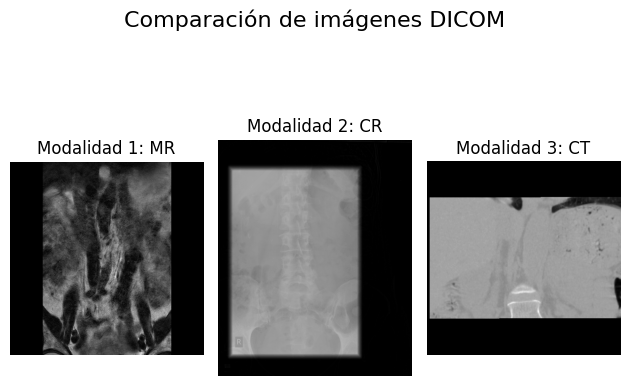

In [11]:
# Recorrer y graficar cada imagen
for i, path in enumerate(rutas_dicom):
    ds = pydicom.dcmread(path)
    img = ds.pixel_array
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Modalidad {i + 1}: {ds.get('Modality', 'N/A')}")
    plt.axis('off')

# Título general
plt.suptitle("Comparación de imágenes DICOM", fontsize=16)
plt.tight_layout()
plt.show()

*  Incluir anotaciones y describir las diferencias encontradas. 